# Experiment 2  
Description :  
* n_fft = 4096 
* Silent parts removed  
* Vocal separated  
* Five classes (Abhogi , Basant , Ahir Bhairav , Alhaiya Bilawal , Bairagi)  


# Install libraries


In [ ]:
!cp -r "/gdrive/My Drive/Major Project/Images/Experiment 2/Data" "/content"

cp: cannot stat '/gdrive/My Drive/Major Project/Images/Experiment 2/Data': No such file or directory


In [ ]:
!pip install flashtorch --quiet

In [1]:
!pip install livelossplot --quiet

In [ ]:
!pip install InaSpeechSegmenter --quiet

     |████████████████████████████████| 13.9MB 235kB/s 
     |████████████████████████████████| 61kB 10.4MB/s 
     |████████████████████████████████| 92kB 10.2MB/s 
     |████████████████████████████████| 174kB 64.4MB/s 
     |████████████████████████████████| 81kB 12.6MB/s 
     |████████████████████████████████| 133kB 65.8MB/s 
     |████████████████████████████████| 163kB 59.3MB/s 
     |████████████████████████████████| 1.1MB 54.3MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done


In [ ]:
!pip install librosa==0.8.0 --quiet

     |████████████████████████████████| 184kB 9.5MB/s 
     |████████████████████████████████| 51kB 6.2MB/s 


In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


# Image generation code / commands

In [ ]:
import os
# from inaSpeechSegmenter.segmenter import Segmenter
import librosa
import librosa.display
import scipy.io.wavfile
import matplotlib.pyplot as plt
import numpy as np
import gc

In [ ]:
def separate_speech_silence(input_file_name , intermediate_path , index):
	"""
	Removes slient parts of the audio and saves resulting wavefile to intermediate path
	"""
	seg = Segmenter()
 
	# print("Segmentation start")
	segmentation = seg(input_file_name)
 
	# print("Segmentation done")
	audio , fs = librosa.load(input_file_name)
 
	audio_result = np.array([])
	noise_result = np.array([])
	start_idx = 0
	for s in segmentation:
		if (s[0] == "music") or (s[0] == "male") or (s[0] == "female"):
			start_sample = librosa.time_to_samples(s[1])
			end_sample = librosa.time_to_samples(s[2])
			# print(start_sample , "\t" , end_sample)
			audio_result = np.append(audio_result , audio[start_sample : end_sample])
		else:
			start_sample = librosa.time_to_samples(s[1])
			end_sample = librosa.time_to_samples(s[2])
			# print(start_sample , "\t" , end_sample)
			noise_result = np.append(noise_result , audio[start_sample : end_sample])

	scipy.io.wavfile.write(os.path.join(intermediate_path , str(index) + ".wav") , fs , audio_result)
	scipy.io.wavfile.write(os.path.join(intermediate_path , str(index) + "_noise.wav") , fs , noise_result)
	

In [ ]:
def make_spec(intermediate_path , output_path , index):
    """
    Makes spectrogram images from audio present at intermediate path and saves images at output path
    """
    # stream = librosa.stream( os.path.join(intermediate_path , str(index)+".wav") , block_length=256, frame_length=2048, hop_length=1024)
    # plt.margins(0,0)
    # idx = 0
    # for y_block in stream:

    #     D_block = librosa.stft(y_block, center=False ,n_fft = 4096, hop_length=64)

    #     fig , ax = plt.subplots()
    #     librosa.display.specshow(D_block , y_axis="linear" , ax=ax)
    #     ax.set_ylim([0,1024])
    #     ax.set_ylabel("")
    #     plt.tick_params(axis="both" ,bottom=False , left=False)
    #     plt.yticks()
    #     ax.get_yaxis().set_visible(False)

    #     plt.savefig(os.path.join(output_path , str(index) + "_" + str(idx) + ".png" ) , bbox_inches="tight" , format="png" , pad_inches=0)
    #     fig.clf()
    #     plt.close()
    #     gc.collect()
    #     idx += 1

    window_length_in_sec = 5
    window_hop_in_sec = 1

    audio , fs = librosa.load(intermediate_path)

    start = 0
    end = window_length_in_sec * fs
    idx = 0
    while end < len(audio):
        D_block = librosa.stft(audio[start:end] , center=False , n_fft = 4096 , hop_length=64)
        fig , ax = plt.subplots()
        librosa.display.specshow(D_block , y_axis="linear" , ax=ax)
        ax.set_ylim([0,1024])
        ax.set_ylabel("")
        plt.tick_params(axis="both" ,bottom=False , left=False)
        plt.yticks()
        ax.get_yaxis().set_visible(False)

        plt.savefig(os.path.join(output_path , str(index) + "_" + str(idx) + ".png" ) , bbox_inches="tight" , format="png" , pad_inches=0)
        fig.clf()
        plt.close()
        gc.collect()

        idx += 1
        start += window_hop_in_sec * fs
        end += window_hop_in_sec * fs



In [ ]:
def generate_images(input_path , audio_path, output_path , index):
    separate_speech_silence(input_path , audio_path , index)
    make_spec(audio_path , output_path , index)


In [ ]:
make_spec("/gdrive/My Drive/Major Project/Images/Experiment 2/Silent split Ragas/Abhogi/1.wav" , "/gdrive/My Drive/Major Project/Images/Experiment 2/test" , 1)

/usr/local/lib/python3.6/dist-packages/librosa/display.py:823: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  "Trying to display complex-valued input. " "Showing magnitude instead."


Import dataset from google sheets

In [ ]:
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [ ]:
import pandas as pd

In [ ]:
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1gysr1UIh8sgLvT7JJEeYHbR-EUQ95TjYE8JT7xowkOs/edit#gid=1882594633')
sheet = wb.worksheet('silent split')
data = sheet.get_all_values()
df = pd.DataFrame(data)
df.columns = df.iloc[0]
df = df.iloc[1:]
df.shape

(239, 2)

In [ ]:
ahir_bhairav = ["/gdrive/My Drive/Major Project/Vocals/Ahir Bhairav/Aahir_Bhairon_51656b20-295c-40f9-8dab-005b9b90fa98/vocals.wav",
                "/gdrive/My Drive/Major Project/Vocals/Ahir Bhairav/Ahir_Bhairav_e2123c63-6a24-4190-be52-e299c05c4bb8/vocals.wav",
                "/gdrive/My Drive/Major Project/Vocals/Ahir Bhairav/Kaise_Manalun_Re_73b6e933-61f6-4537-98df-834e3c0e0fa6/vocals.wav",
                "/gdrive/My Drive/Major Project/Vocals/Ahir Bhairav/Raag_Ahir_Bhairon_2073b056-8120-4b04-b808-3d6a8c6a2bd7/vocals.mp3",
                "/gdrive/My Drive/Major Project/Vocals/Ahir Bhairav/Raga_-_Ahir_Bhairav_53402748-f637-46a0-817d-ac711a9005ff/vocals.mp3",
                "/gdrive/My Drive/Major Project/Vocals/Ahir Bhairav/Raga_-_Ahir_Bhairav_def59da7-8d7b-4047-b16c-eeee65482e87/vocals.mp3",
                "/gdrive/My Drive/Major Project/Vocals/Ahir Bhairav/Raga_Ahir_Bhairav_-_Rasiya_Mhara_Mharoji_b31c1429-f99f-481c-9a0e-cb2d2f99ac84/vocals.wav",
                "/gdrive/My Drive/Major Project/Vocals/Ahir Bhairav/Raga_Ahir_Bhairav_567e57a7-26c8-49c3-8a2c-fc2485cf2ab9/vocals.mp3",
                "/gdrive/My Drive/Major Project/Vocals/Ahir Bhairav/Raga_Ahir_Bhairav_cbcba04b-023b-40e0-a5e8-04260ad3efdd/vocals.mp3",
                "/gdrive/My Drive/Major Project/Vocals/Ahir Bhairav/Raga_Ahir_Bhairav_f93a15cf-8ec1-43c7-b7e3-b48f5369dee4/vocals.wav"]

bilawal = ["/gdrive/My Drive/Major Project/Vocals/Alhaiya Bilawal/Kahe_Ko_Garabh_Keeno_f5689624-b636-4a6c-831f-53d1678d9bb6/vocals.wav",
           "/gdrive/My Drive/Major Project/Vocals/Alhaiya Bilawal/Karat_Shringar_Maiya_Man_Bhavat_7ed38940-f5e5-46cb-897d-ed408ddf8c85/vocals.wav",
           "/gdrive/My Drive/Major Project/Vocals/Alhaiya Bilawal/Laita_Jaiyo_3766bcb1-57b6-4c16-9196-c2ed94d80331/vocals.wav",
           "/gdrive/My Drive/Major Project/Vocals/Alhaiya Bilawal/Mangta_Hoon_Tere_Dar_Ka__E_Ha_Jiyo_Pa_c53396aa-f369-4875-8c61-3f29787da6f5/vocals.wav",
           "/gdrive/My Drive/Major Project/Vocals/Alhaiya Bilawal/Raga_Alahiya_Bilawal-Drut_Teental_0017d78e-a39d-4151-8d93-826ab2eb00d8/vocals.wav",
           "/gdrive/My Drive/Major Project/Vocals/Alhaiya Bilawal/Raga_Alahiya_Bilawal-Vilambit_Teental_b22390c8-88bb-4e1f-9e23-bd3e237043ba/vocals.wav",
           "/gdrive/My Drive/Major Project/Vocals/Alhaiya Bilawal/Raga_Alahiya_Bilawal_9117fa28-df28-4bb8-a0e3-b70e60fed262/vocals.mp3",
           "/gdrive/My Drive/Major Project/Vocals/Alhaiya Bilawal/Raga_Alhaiya_Bilawal_3d0539f5-2d30-422f-9647-b3e14fd9787d/vocals.wav",
           "/gdrive/My Drive/Major Project/Vocals/Alhaiya Bilawal/Raga_Alhaiya_Bilawal_Drut_Khayal_-_Teental_Sitarkhani_04d506c4-df9e-410c-a3e2-037abffe7b9c/vocals.wav",
           "/gdrive/My Drive/Major Project/Vocals/Alhaiya Bilawal/Raga_Alhaiya_Bilawal_Vilambit_Khayal_-_Teental_30261aa8-aa4d-4f66-a2d4-b087668b00a8/vocals.mp3"]

bairagi = ["/gdrive/My Drive/Major Project/Vocals/Bairagi/Bairagi_b71c2774-2532-4692-8761-5452e2a83118/vocals.wav",
           "/gdrive/My Drive/Major Project/Vocals/Bairagi/Bina_Prabhu_Kaun_4b587d3f-4014-4d68-a958-17d51fe2c1c1/vocals.mp3",
           "/gdrive/My Drive/Major Project/Vocals/Bairagi/Karat_Hun_Tero_Hi_Dhyan_9f4a4fc5-d5c0-4757-b875-9dbb2a83302f/vocals.wav",
           "/gdrive/My Drive/Major Project/Vocals/Bairagi/Mere_Maname_Baso_Ram_Abhiram_Puran_Ho_Sab_Kaam_950c9b6a-53e6-43e2-9339-82ba49ade152/vocals.mp3",
           "/gdrive/My Drive/Major Project/Vocals/Bairagi/Raag_Bairagi_ea36cb14-7c11-41d0-acb8-70ec66e61063/vocals.mp3",
           "/gdrive/My Drive/Major Project/Vocals/Bairagi/Raga_Bairagi_Bhairav_c83a26a9-452f-49f4-bb4e-fad2d9bb9af1/vocals.wav",
           "/gdrive/My Drive/Major Project/Vocals/Bairagi/Raga_Bairagi_Man_Sumarat_Nis_Din_Tumharo_Naam_205d79c6-ad14-4193-be7c-3f32457eda60/vocals.wav",
           "/gdrive/My Drive/Major Project/Vocals/Bairagi/Raga_Bairagi_d56b4f36-3101-4962-867b-40ee9906dd5a/vocals.mp3",
           "/gdrive/My Drive/Major Project/Vocals/Bairagi/Raga_Bairagi_ef986f34-db14-4d1e-8dea-a623286b35fc/vocals.wav",
           "/gdrive/My Drive/Major Project/Vocals/Bairagi/Sur_Sur_Se_Sadh_Le_Rasika_Sabada_Salone_Laya_Tala_Surana_2e399218-6978-47ef-ad3f-c7eca6dad81b/vocals.wav"]

bageshri = ["/gdrive/My Drive/Major Project/Vocals/Bageshri/Kaum_Fande_Mope_Daal_Gayo_and_Ja_Re_Balama_To_Se_Nahin_Bolun_afe4855b-9b3e-477a-944a-251b6bb7dd97/vocals.wav",
            "/gdrive/My Drive/Major Project/Vocals/Bageshri/Mohe_Manavan_Aaya_and_Na_Daro_Rang_c6dfc5f0-34cb-4d1e-90a0-712a845beb38/vocals.wav",
            "/gdrive/My Drive/Major Project/Vocals/Bageshri/Raag_Bageshree_897f4174-24be-493a-be1c-57fd3c018601/vocals.wav",
            "/gdrive/My Drive/Major Project/Vocals/Bageshri/Raga_Bageshree_186b62f6-3073-4817-a075-439cad73305c/vocals.wav",
            "/gdrive/My Drive/Major Project/Vocals/Bageshri/Raga_Bageshree_bf3e009b-5d36-46a2-8fde-3c019c9fef1a/vocals.wav",
            "/gdrive/My Drive/Major Project/Vocals/Bageshri/Raga_Bageshri_1d378f5b-33ac-47ae-9219-a03a394de1b9/vocals.wav",
            "/gdrive/My Drive/Major Project/Vocals/Bageshri/Raga_Bageshri_47b78e45-4a67-49e7-94db-aac7fc8a3db7/vocals.wav",
            "/gdrive/My Drive/Major Project/Vocals/Bageshri/Raga_Bageshri_c12784d9-c5d7-4883-adae-8140551480c4/vocals.wav",
            "/gdrive/My Drive/Major Project/Vocals/Bageshri/Raga_Bhageshri_6cb0fc24-76bf-48a8-8a45-8552b70127ea/vocals.wav",
            "/gdrive/My Drive/Major Project/Vocals/Bageshri/Sakhi_Mana_Lage_Na_and_Shyaam_Ghan_Chhaye_58ffbe74-0145-48b9-bc41-fa9e4b3a59cc/vocals.wav"]

In [ ]:
# trial code
class_name = "Bhairav"
temp = df.loc[df['Raga']==class_name]
base_s = "/gdrive/My Drive/Major Project/Vocals/"
raga_class = []
for i in range(len(temp)):
    raga_class.append(base_s + class_name + "/"+ str(temp.iloc[i][1]) + "/vocals.wav")
print(raga_class)

['/gdrive/My Drive/Major Project/Vocals/Bhairav/Dir_Tana_Dir-Dir_Ta-Dir_(Tarana)_52c68301-d913-4208-adc6-c2cf8d2003d3/vocals.wav', '/gdrive/My Drive/Major Project/Vocals/Bhairav/Magwa_Pe_Rokey_Thharo_Ree_8718d4df-5fcb-419f-b209-5d34b2474a28/vocals.wav', '/gdrive/My Drive/Major Project/Vocals/Bhairav/Malana_Gungh_Lao_Is_Banre_Kay_Se_Sehara_3956d76d-876b-4e34-a6dd-c8ecfc057ff8/vocals.wav', '/gdrive/My Drive/Major Project/Vocals/Bhairav/Pratham_Man_Nirankar_Devan_Man_Mahadev_30408242-719e-4efb-a72d-fc1dc2833db7/vocals.wav', '/gdrive/My Drive/Major Project/Vocals/Bhairav/Raag_Bhairav_0a11bf6f-b55d-459c-9447-7a5a555a286f/vocals.wav', '/gdrive/My Drive/Major Project/Vocals/Bhairav/Rag_Bhairav_(Jhaptal)_3abaaa52-4c95-4e8b-beda-37bc3d01f763/vocals.wav', '/gdrive/My Drive/Major Project/Vocals/Bhairav/Man_Re_Tu_Kar_Dhyan_5a73fd2e-2308-49c3-81de-e3baa95d2c1b/vocals.wav', '/gdrive/My Drive/Major Project/Vocals/Bhairav/Raga_Bhairav_2b1da797-d9f6-47bc-93c0-d19f5de0fa5d/vocals.wav', '/gdrive/My Drive

In [ ]:
# append the list of classes in the below list
classes = ['Jog']

In [ ]:
for raag in classes:
    seperate_class_raga(raag)

Jog
Raag_Jog_566d6c64-ae66-45e7-9f91-e33cd6c0f18f


/usr/local/lib/python3.6/dist-packages/pyannote/algorithms/utils/viterbi.py:88: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  for e, c in six.moves.zip(emission.T, consecutive)
/usr/local/lib/python3.6/dist-packages/pyannote/algorithms/utils/viterbi.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  for e, c in six.moves.zip(constraint.T, consecutive)
/usr/local/lib/python3.6/dist-packages/inaSpeechSegmenter/segmenter.py:60: RuntimeWarning: invalid value encountered in subtract
  data = (data - np.mean(data, axis=1).reshape((len(data), 1))) / np.std(data, axis=1).reshape((len(data), 1))
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:19


Raag_Jog_d0781259-2c63-4b35-8ca3-75c19a98e275


/usr/local/lib/python3.6/dist-packages/pyannote/algorithms/utils/viterbi.py:88: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  for e, c in six.moves.zip(emission.T, consecutive)
/usr/local/lib/python3.6/dist-packages/pyannote/algorithms/utils/viterbi.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  for e, c in six.moves.zip(constraint.T, consecutive)
/usr/local/lib/python3.6/dist-packages/inaSpeechSegmenter/segmenter.py:60: RuntimeWarning: invalid value encountered in subtract
  data = (data - np.mean(data, axis=1).reshape((len(data), 1))) / np.std(data, axis=1).reshape((len(data), 1))
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:19


Raag_Jog_-_Khayal_59ebf93e-fb88-4ac1-b400-000ffbc7ae3d


/usr/local/lib/python3.6/dist-packages/pyannote/algorithms/utils/viterbi.py:88: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  for e, c in six.moves.zip(emission.T, consecutive)
/usr/local/lib/python3.6/dist-packages/pyannote/algorithms/utils/viterbi.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  for e, c in six.moves.zip(constraint.T, consecutive)
/usr/local/lib/python3.6/dist-packages/inaSpeechSegmenter/segmenter.py:60: RuntimeWarning: invalid value encountered in subtract
  data = (data - np.mean(data, axis=1).reshape((len(data), 1))) / np.std(data, axis=1).reshape((len(data), 1))
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:19


Alaap_And_Stuti_-_Raag_Jog_86d7779a-1610-4514-83a6-883997250abe


/usr/local/lib/python3.6/dist-packages/pyannote/algorithms/utils/viterbi.py:88: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  for e, c in six.moves.zip(emission.T, consecutive)
/usr/local/lib/python3.6/dist-packages/pyannote/algorithms/utils/viterbi.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  for e, c in six.moves.zip(constraint.T, consecutive)
/usr/local/lib/python3.6/dist-packages/inaSpeechSegmenter/segmenter.py:60: RuntimeWarning: invalid value encountered in subtract
  data = (data - np.mean(data, axis=1).reshape((len(data), 1))) / np.std(data, axis=1).reshape((len(data), 1))
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:19


Bandish_In_Drut_Teentaal_-_Raag_Jog_c02f714f-e4e6-4da6-af07-cea8a03c0e5c


/usr/local/lib/python3.6/dist-packages/pyannote/algorithms/utils/viterbi.py:88: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  for e, c in six.moves.zip(emission.T, consecutive)
/usr/local/lib/python3.6/dist-packages/pyannote/algorithms/utils/viterbi.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  for e, c in six.moves.zip(constraint.T, consecutive)
/usr/local/lib/python3.6/dist-packages/inaSpeechSegmenter/segmenter.py:60: RuntimeWarning: invalid value encountered in subtract
  data = (data - np.mean(data, axis=1).reshape((len(data), 1))) / np.std(data, axis=1).reshape((len(data), 1))
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:19


Bandish_In_Vlambit_Ektaal_-_Raag_Jog_3f66f0dc-73b7-48c4-8ad7-1f1a7dacd8bb


/usr/local/lib/python3.6/dist-packages/pyannote/algorithms/utils/viterbi.py:88: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  for e, c in six.moves.zip(emission.T, consecutive)
/usr/local/lib/python3.6/dist-packages/pyannote/algorithms/utils/viterbi.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  for e, c in six.moves.zip(constraint.T, consecutive)
/usr/local/lib/python3.6/dist-packages/inaSpeechSegmenter/segmenter.py:60: RuntimeWarning: invalid value encountered in subtract
  data = (data - np.mean(data, axis=1).reshape((len(data), 1))) / np.std(data, axis=1).reshape((len(data), 1))
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:19


Raag_Jog_99dcaebe-ab49-4fa3-ab6c-a9458143af8e


/usr/local/lib/python3.6/dist-packages/pyannote/algorithms/utils/viterbi.py:88: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  for e, c in six.moves.zip(emission.T, consecutive)
/usr/local/lib/python3.6/dist-packages/pyannote/algorithms/utils/viterbi.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  for e, c in six.moves.zip(constraint.T, consecutive)
/usr/local/lib/python3.6/dist-packages/inaSpeechSegmenter/segmenter.py:60: RuntimeWarning: invalid value encountered in subtract
  data = (data - np.mean(data, axis=1).reshape((len(data), 1))) / np.std(data, axis=1).reshape((len(data), 1))
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:19


Raga_Jog_baea9093-d2c8-4529-8bc8-02ce7554c555


/usr/local/lib/python3.6/dist-packages/pyannote/algorithms/utils/viterbi.py:88: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  for e, c in six.moves.zip(emission.T, consecutive)
/usr/local/lib/python3.6/dist-packages/pyannote/algorithms/utils/viterbi.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  for e, c in six.moves.zip(constraint.T, consecutive)
/usr/local/lib/python3.6/dist-packages/inaSpeechSegmenter/segmenter.py:60: RuntimeWarning: invalid value encountered in subtract
  data = (data - np.mean(data, axis=1).reshape((len(data), 1))) / np.std(data, axis=1).reshape((len(data), 1))
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:19


Raga_Jog_a7f6551d-9696-4713-becb-b22acf71a7db


/usr/local/lib/python3.6/dist-packages/pyannote/algorithms/utils/viterbi.py:88: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  for e, c in six.moves.zip(emission.T, consecutive)
/usr/local/lib/python3.6/dist-packages/pyannote/algorithms/utils/viterbi.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  for e, c in six.moves.zip(constraint.T, consecutive)
/usr/local/lib/python3.6/dist-packages/inaSpeechSegmenter/segmenter.py:60: RuntimeWarning: invalid value encountered in subtract
  data = (data - np.mean(data, axis=1).reshape((len(data), 1))) / np.std(data, axis=1).reshape((len(data), 1))
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:19

In [ ]:
def seperate_class_raga(class_name):
    # class_name = "Darbari"
    print("\033[1m" + class_name + "\033[0m")

    temp = df.loc[df['Raga']==class_name]
    base_s = "/gdrive/My Drive/Major Project/Vocals/"
    raga_class = []
    for i in range(len(temp)):
        raga_class.append(base_s + class_name + "/"+ str(temp.iloc[i][1]) + "/vocals.wav")

    output_loc = "/gdrive/My Drive/Major Project/Images/Experiment 2/Silent split Ragas/" + class_name
    os.makedirs(output_loc)
    for idx in range(len(raga_class)):
        print("\033[1m" + str(temp.iloc[idx][1]) + "\033[0m")
        separate_speech_silence(raga_class[idx] , output_loc, idx )
        print()

In [ ]:
for idx in range(len(bairagi)):
    generate_images(bairagi[idx] , "/gdrive/My Drive/Major Project/Images/Experiment 2/Bairagi" ,"/gdrive/My Drive/Major Project/Images/Experiment 2/Spectrograms/Bairagi" , idx )

# Data Splitting

In [ ]:
!pip install split-folders

In [ ]:
import splitfolders
input_folder = "/gdrive/My Drive/Major Project/Images/Experiment 2/Spectrograms"
output_folder = "/gdrive/My Drive/Major Project/Images/Experiment 2/Data"
splitfolders.ratio(input_folder , output=output_folder, seed=42, ratio=(.8, .1, .1), group_prefix=None)

Copying files: 3223 files [13:46,  3.90 files/s]


# Imports

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms as transforms
import torch.optim as optim
from torchvision import datasets
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [4]:
from livelossplot import PlotLosses

# Data Loading

In [ ]:
# Data transforms : Resizing , Converting to Pytorch tensor , Nomralizing the image
# data_transforms = {
#     'train' : transforms.Compose([transforms.Resize(size=(324,216)),
#                                  transforms.ToTensor(),
#                                  transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])]),
#     'valid': transforms.Compose([transforms.Resize(size=(324,216)),
#                                transforms.ToTensor(),
#                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])]),
#     'test': transforms.Compose([transforms.Resize(size=(324,216)),
#                                transforms.ToTensor(),
#                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])]) 
# }

data_transforms = {
    'train' : transforms.Compose([transforms.Resize(size=(324,216)),
                                 transforms.ToTensor(),
                                 ]),
    'valid': transforms.Compose([transforms.Resize(size=(324,216)),
                               transforms.ToTensor(),
                               ]),
    'test': transforms.Compose([transforms.Resize(size=(324,216)),
                               transforms.ToTensor(),
                               ]) 
}

main_dir = "/gdrive/My Drive/Major Project/Images/Experiment 2/Data"
# main_dir = "/content/Data"
train_dir = os.path.join(main_dir, "train")
test_dir = os.path.join(main_dir, "val")
valid_dir = os.path.join(main_dir, "test")

# Making dataset objects
train_data = datasets.ImageFolder(train_dir, transform=data_transforms['train'])
valid_data = datasets.ImageFolder(valid_dir, transform=data_transforms['valid'])
test_data = datasets.ImageFolder(test_dir, transform=data_transforms['test'])

batch_size = 8
num_workers = 0

# Making dataloader objects
train_loader = torch.utils.data.DataLoader(train_data,
                                           batch_size=batch_size, 
                                           num_workers=num_workers,
                                           shuffle=True,
                                           drop_last = True,)
valid_loader = torch.utils.data.DataLoader(valid_data,
                                           batch_size=batch_size, 
                                           num_workers=num_workers,
                                           shuffle=True,
                                           drop_last=True)
test_loader = torch.utils.data.DataLoader(test_data,
                                           batch_size=1, 
                                           num_workers=num_workers,
                                           shuffle=True)
loaders = {
    'train': train_loader,
    'valid': valid_loader,
    'test': test_loader
}

# Modeling


In [5]:
"""
This method returns Sequential Conv2d with/without batch normalisation of given size, same size by default
"""
def conv(in_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False, batch_norm=False):
    layers = []
    layers.append(nn.Conv2d(in_channels, out_channels, kernel_size, stride=stride, padding=padding, bias=bias))
    if batch_norm:
        layers.append(nn.BatchNorm2d(out_channels))
    return nn.Sequential(*layers)

"""
Returns Maxpool2D, shrinks in half by default
"""
def pool(kernel_size=2, stride=2, padding=0):
    layers = []
    layers.append(nn.MaxPool2d(kernel_size, stride=stride, padding=padding))
    return nn.Sequential(*layers)

"""
Modify this to experiment on CNN architecture
Basic flow => Conv => BatchNorm => Activation => Dropout => Pooling
"""
class CNN(nn.Module):

    """
    Change in architecture must change forward function
    """
    def __init__(self, output_size=10):
        super(CNN, self).__init__()
        self.conv1 = conv(3, 32, 3, stride=1, padding=1, batch_norm=True)
        self.pool1 = pool(3, stride=3, padding=0)
        self.conv2 = conv(32, 64, 3, stride=1, padding=1, batch_norm=True)
        self.pool2 = pool(2, stride=2, padding=0)
        self.conv3 = conv(64, 64, 3, stride=1, padding=1, batch_norm=True)
        self.pool3 = pool(2, stride=2, padding=0)
        self.conv4 = conv(64, 64, 3, stride=1, padding=1, batch_norm=True)
        self.pool4 = pool(2, stride=2, padding=0)
        # TODO: write input size of FC1
        self.fc1 = nn.Linear(13*9*64, 512)
        self.fc2 = nn.Linear(512, output_size)
        self.softmax = nn.LogSoftmax(dim=1)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = self.conv1(x)                              # (324,216,3) => (324 , 216 , 32)
        x = F.relu(x)
        x = self.dropout(x)                           
        x = self.pool1(x)                              # (324 , 216 , 32) => (108 , 72 , 32)
        
        # print("Shape after 1st pooling layer " , x.shape)
        # One liner for all
        x = self.pool2(self.dropout(F.relu(self.conv2(x))))   # (107 , 71 , 32) => (107 , 71 , 64) => (54 , 36 , 64)
        # print("Shape after 2nd pooling layer " , x.shape)
        
        x = self.pool3(self.dropout(F.relu(self.conv3(x))))   #(54 , 36 , 64) => (54 , 36 , 128) => (27 , 18 , 64)
        # print("Shape after 3rd pooling layer " , x.shape)
        
        x = self.pool4(self.dropout(F.relu(self.conv4(x))))   # (13 , 9 , 64) 
        # print("Shape after 4th pooling layer " , x.shape)
        
        # Flatten                                             
        x = x.view(-1, x.shape[3]*x.shape[1]*x.shape[2])
        # print("Shape after flattening " , x.shape)
        
        x = F.relu(self.fc1(x))
        # print("Shape after FC 1 " , x.shape)

        x = self.dropout(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x

# Training



In [ ]:
def train(model, loaders, n_epochs, optimizer, criterion, device, save_path, print_every=100 , stop_after=3):
    valid_loss_min = np.Inf
    stop = stop_after
    liveloss = PlotLosses()

    for epoch in range(1, n_epochs+1):
        logs = {}
        
        train_loss = 0.0
        valid_loss = 0.0
        running_loss_t = 0.0
        running_correct_t = 0
        running_loss_v = 0.0
        running_correct_v = 0.0
        print("Epoch number start " ,str(epoch) )
        # training
        model.train()
        for batch_index, (data, target) in enumerate(loaders['train']):
            if device == 'cuda':
                data, target = data.cuda(), target.cuda()

            # print("Data size " , data.shape)
            # print("Target " , target)
            optimizer.zero_grad()         
            pred = model(data)
            # print("Pred " , pred)
            loss = criterion(pred, target)
            # running_loss_t += loss.detach()*data.size(0)
            loss.backward()
            optimizer.step()

            running_loss_t += loss.detach()*data.size(0)
            # running_corrects_ += torch.sum(pred == target)
            train_loss += ((1 / (batch_index + 1)) * (loss.data - train_loss))

            if batch_index%print_every == 0:
                print(f"Epoch {epoch} Batch {batch_index} loss {train_loss}")
        
        epoch_loss_t = running_loss_t / len(loaders["train"].dataset)
        logs["log loss"] = epoch_loss_t.item()
        
        
        # validation
        model.eval()
        for batch_index, (data, target) in enumerate(loaders['valid']):
            if device == 'cuda':
                data, target = data.cuda(), target.cuda()
            # print("VAlid data shape " , data.shape)
            pred = model(data)
            loss = criterion(pred, target)
            running_loss_v += loss.detach()*data.size(0)
            valid_loss += ((1 / (batch_index + 1)) * (loss.data - valid_loss))

        epoch_loss_v = running_loss_v / len(loaders["valid"].dataset)
        logs["val_log loss"] = epoch_loss_v.item()

        liveloss.update(logs)
        liveloss.send()

        print(f"Epoch: {epoch} Training Loss: {train_loss} Validation Loss: {valid_loss}")

        if valid_loss > valid_loss_min:
            torch.save(model.state_dict(), save_path)
            print(f"Validation Loss decreased from {valid_loss_min} to {valid_loss}. Saving model...")
            valid_loss_min = valid_loss
            stop_after = stop
        else:
            stop_after -= 1

        if stop_after == 0:
            return model
        print("Epoch end ",str(epoch))
    return model

# Main


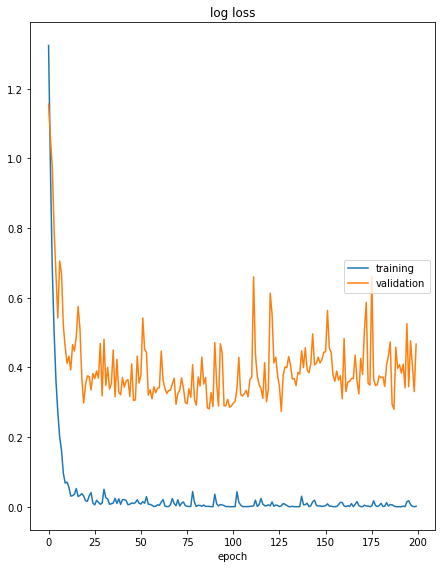

log loss
	training         	 (min:    0.000, max:    1.324, cur:    0.001)
	validation       	 (min:    0.274, max:    1.156, cur:    0.467)
Epoch: 200 Training Loss: 0.0013923681108281016 Validation Loss: 0.47717589139938354
Epoch end  200


In [ ]:
if torch.cuda.is_available():
    device = 'cuda'
else:
    device = 'cpu'
model = CNN(output_size=5)

if device == 'cuda':
    model = model.cuda()

model = model.cuda()
# Loss class
criterion = torch.nn.NLLLoss()
# Optimizer class
optimizer = optim.Adam(params=model.parameters() , lr=0.0001)

model = train(model, loaders, 200, optimizer, criterion, device, os.path.join("/gdrive/My Drive/Major Project/Images/Experiment 2","model_5classes.pt"), print_every=100 , stop_after=300)
# test(model, loaders, criterion, device)

# Testing


In [ ]:
def test(model, loaders, criterion, device):
    test_loss = 0.0
    correct = 0.0
    total = 0.0

    model.eval()
    for batch_index, (data, target) in enumerate(loaders['test']):
        if device == 'cuda':
            data, target = data.cuda(), target.cuda()
        pred = model(data)
        loss = criterion(pred, target)
        test_loss += ((1 / (batch_index + 1)) * (loss.data - test_loss))
        pred = pred.data.max(1, keepdim=True)[1]
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)

    print(f"Test loss {test_loss}")
    print(f"Testing accuracy {correct/total}")

In [ ]:
print(len(loaders["test"].dataset))

320


In [ ]:
# model = torch.load(os.path.join("/gdrive/My Drive/Major Project/Images/Experiment 1","model.pt"))
# model = CNN(output_size = 2)
# model.load_state_dict(torch.load(os.path.join("/gdrive/My Drive/Major Project/Images/Experiment 1","model.pt")))
# model = model.cuda()
test(model, loaders, criterion, device)

Test loss 0.42829614877700806
Testing accuracy 0.9


In [ ]:
torch.save(model.state_dict() , os.path.join("/gdrive/My Drive/Major Project/Images/Experiment 2","model_5classes_200e.pt"))

# LSTM data preparation

In [19]:
"""
Making a dataframe of all spectrogram files' path and their class
"""
import pandas as pd

path_df = pd.DataFrame(columns=["Path" , "Name" , "Raga"])
paths = []
names = []
ragas = []

dataset_path = "/gdrive/My Drive/Major Project/Images/Experiment 2/Spectrograms"

raga_classes = ["Abhogi", "Ahir Bhairav", "Alhaiya Bilawal", "Basant", "Bairagi"]

# for file_name in os.listdir(os.path.join(dataset_path , "Abhogi")):
#     paths.append(os.path.join(dataset_path , "Abhogi" , file_name))
#     names.append(file_name.split("_")[0])
#     ragas.append("Abhogi")

# for file_name in os.listdir(os.path.join(dataset_path , "Basant")):
#     paths.append(os.path.join(dataset_path , "Basant" , file_name))
#     names.append(file_name.split("_")[0])
#     ragas.append("Basant")

for raga_class in raga_classes:
  for file_name in os.listdir(os.path.join(dataset_path , raga_class)):
    paths.append(os.path.join(dataset_path , raga_class , file_name))
    names.append(file_name.split("_")[0])
    ragas.append(raga_class)

path_df.Path = paths
path_df.Name = names
path_df.Raga = ragas

path_df.to_csv(dataset_path + str("/file.csv"))

raga_name_groupby = path_df.groupby(by=["Raga" , "Name"])
# print(raga_name_groupby.count())

In [ ]:
print(raga_name_groupby.count())

                      Path
Raga            Name      
Abhogi          1       57
                10      27
                2       47
                3      124
                4       21
                5       65
                6      107
                7       53
                8       42
                9       80
Ahir Bhairav    0       43
                1       41
                2       21
                3      133
                4       90
                5       82
                6        8
                7      108
                8       97
                9       26
Alhaiya Bilawal 0       89
                1       24
                2       20
                3       58
                4       27
                5       67
                6       98
                7       72
                8       43
                9      158
Bairagi         0       67
                1       84
                2       23
                3      119
                4      162
 

In [20]:
"""
Making sequences from the input 
"""
def batch_data(words, sequence_length, batch_size , raga_name , features , target):    
    n_targets = len(words) - sequence_length
    
    if n_targets < 1:
        return 
    
    for i in range(n_targets):
        end_idx = i + sequence_length
        
        batch = words[i : end_idx]
        features.append(batch)
        target.append(raga_name)
        
    return features , target

In [21]:
"""
Saving pickle files of sequences of paths
"""
import pickle

raga_names = ["Abhogi", "Ahir Bhairav", "Alhaiya Bilawal", "Bairagi", "Basant"]
min_count = {"Abhogi":1, "Ahir Bhairav":0, "Alhaiya Bilawal":0, "Bairagi":0, "Basant":1}
max_count = {"Abhogi":11, "Ahir Bhairav":10, "Alhaiya Bilawal":10, "Bairagi":10, "Basant":11}

for raga_name in raga_names:
    features = []
    target = []
    for i in range(min_count[raga_name],max_count[raga_name]):
        # print("Starting " , i)
        features , target = batch_data(list(raga_name_groupby.get_group((raga_name,str(i))).Path) , 5 , 1 , raga_name , features , target)
        # print("Ending " , i)
    
    # print(len(target))
    with open(os.path.join("/gdrive/My Drive/Major Project/Images/Experiment 2/Paths" , raga_name + "_feature") , "wb") as f:
        pickle.dump(features , f)
    with open(os.path.join("/gdrive/My Drive/Major Project/Images/Experiment 2/Paths" , raga_name + "_target") , "wb") as f:
        pickle.dump(target , f)
print(features)

[['/gdrive/My Drive/Major Project/Images/Experiment 2/Spectrograms/Basant/1_9.png', '/gdrive/My Drive/Major Project/Images/Experiment 2/Spectrograms/Basant/1_14.png', '/gdrive/My Drive/Major Project/Images/Experiment 2/Spectrograms/Basant/1_16.png', '/gdrive/My Drive/Major Project/Images/Experiment 2/Spectrograms/Basant/1_18.png', '/gdrive/My Drive/Major Project/Images/Experiment 2/Spectrograms/Basant/1_33.png'], ['/gdrive/My Drive/Major Project/Images/Experiment 2/Spectrograms/Basant/1_14.png', '/gdrive/My Drive/Major Project/Images/Experiment 2/Spectrograms/Basant/1_16.png', '/gdrive/My Drive/Major Project/Images/Experiment 2/Spectrograms/Basant/1_18.png', '/gdrive/My Drive/Major Project/Images/Experiment 2/Spectrograms/Basant/1_33.png', '/gdrive/My Drive/Major Project/Images/Experiment 2/Spectrograms/Basant/1_2.png'], ['/gdrive/My Drive/Major Project/Images/Experiment 2/Spectrograms/Basant/1_16.png', '/gdrive/My Drive/Major Project/Images/Experiment 2/Spectrograms/Basant/1_18.png', 

In [6]:
"""
Loading pickle files
"""
import pickle
abhogi_fv = pickle.load(open("/gdrive/My Drive/Major Project/Images/Experiment 2/Paths/Abhogi_feature" , "rb"))
abhogi_t = pickle.load(open("/gdrive/My Drive/Major Project/Images/Experiment 2/Paths/Abhogi_target" , "rb"))

ahir_bhairav_fv = pickle.load(open("/gdrive/My Drive/Major Project/Images/Experiment 2/Paths/Ahir Bhairav_feature" , "rb"))
ahir_bhairav_t = pickle.load(open("/gdrive/My Drive/Major Project/Images/Experiment 2/Paths/Ahir Bhairav_target" , "rb"))

alhaiya_bilwal_fv = pickle.load(open("/gdrive/My Drive/Major Project/Images/Experiment 2/Paths/Alhaiya Bilawal_feature" , "rb"))
alhaiya_bilwal_t = pickle.load(open("/gdrive/My Drive/Major Project/Images/Experiment 2/Paths/Alhaiya Bilawal_target" , "rb"))

bairagi_fv = pickle.load(open("/gdrive/My Drive/Major Project/Images/Experiment 2/Paths/Bairagi_feature" , "rb"))
bairagi_t = pickle.load(open("/gdrive/My Drive/Major Project/Images/Experiment 2/Paths/Bairagi_target" , "rb"))

basant_fv = pickle.load(open("/gdrive/My Drive/Major Project/Images/Experiment 2/Paths/Basant_feature" , "rb"))
basant_t = pickle.load(open("/gdrive/My Drive/Major Project/Images/Experiment 2/Paths/Basant_target" , "rb"))


In [7]:
"""
Train test split
"""
from sklearn.model_selection import train_test_split

full_fv = abhogi_fv + ahir_bhairav_fv + alhaiya_bilwal_fv + bairagi_fv + basant_fv  
full_t = abhogi_t + ahir_bhairav_t + alhaiya_bilwal_t + bairagi_t + basant_t

X_train ,  X_test , y_train ,y_test = train_test_split(full_fv , full_t , test_size = 0.2)
X_valid ,  X_test , y_valid ,y_test = train_test_split(X_test ,y_test, test_size = 0.5)

print(len(X_train))
# print(X_train)
print(len(X_valid))
print(len(X_test))

2378
297
298


In [8]:
"""
Custom Dataset class inheriting abstract Dataset class
"""
class SequenceDataset(torch.utils.data.Dataset):
    def __init__(self , x , y , cnn_model , test_transforms):
        self.x = x
        self.y = y
        self.cnn_model = cnn_model
        self.cnn_model.eval()
        self.test_transforms = test_transforms
        self.raga_encode = {"Abhogi":0, "Ahir Bhairav":1, "Alhaiya Bilawal":2, "Bairagi":3, "Basant":4}

    def __len__(self):
        return(len(self.x))

    def __getitem__(self , idx):
        """
        Returns sequence of feature vectors by getting output from cnn model
        """
        arr = self.x[idx]
        out = []
        with torch.no_grad():
            for path in arr:
                with open(path, 'rb') as f:
                    img = Image.open(f)
                    img = img.convert('RGB')
                img = self.test_transforms(img)
                img = img.cuda()
                output = self.cnn_model(img.unsqueeze(0))
                output = output.reshape(-1,13*9*64)
                out.append(output)
            
        # if self.y[idx] == "Abhogi":
        #     t = torch.Tensor([0]).long()
        # else:
        #     t= torch.Tensor([1]).long()
        t = torch.Tensor([self.raga_encode[self.y[idx]] ]).long()
        return torch.stack(out) , t


# Transforms
test_transforms = transforms.Compose([transforms.Resize(size=(324,216)),
                                 transforms.ToTensor()])

# Loading the CNN model and removing the fully connected layers
model = CNN(output_size = 5)
model.load_state_dict(torch.load(os.path.join("/gdrive/My Drive/Major Project/Images/Experiment 2","model_5classes_200e.pt") ,  map_location=torch.device('cpu')))
model = model.cuda()
cnn_model = nn.Sequential(*list(model.children())[:8])

# Making dataset objects
train_dataset = SequenceDataset(X_train , y_train , cnn_model , test_transforms)
valid_dataset = SequenceDataset(X_valid , y_valid , cnn_model , test_transforms)
test_dataset = SequenceDataset(X_test , y_test , cnn_model , test_transforms)



In [9]:
# Making Dataloader objects
loaders = {
    "train" : torch.utils.data.DataLoader(train_dataset,
                                           batch_size=16, 
                                           num_workers=0,
                                           shuffle=True,
                                           drop_last = True) ,
    "valid" : torch.utils.data.DataLoader(valid_dataset,
                                           batch_size=16, 
                                           num_workers=0,
                                           shuffle=True,
                                           drop_last = True) ,
    "test" : torch.utils.data.DataLoader(test_dataset,
                                           batch_size=16, 
                                           num_workers=0,
                                           shuffle=True,
                                           drop_last = True)
}

In [27]:
print(len(os.listdir("/gdrive/My Drive/Major Project/Images/Experiment 2/Spectrograms/Abhogi")))
print(len(os.listdir("/gdrive/My Drive/Major Project/Images/Experiment 2/Spectrograms/Ahir Bhairav")))
print(len(os.listdir("/gdrive/My Drive/Major Project/Images/Experiment 2/Spectrograms/Alhaiya Bilawal")))
print(len(os.listdir("/gdrive/My Drive/Major Project/Images/Experiment 2/Spectrograms/Bairagi")))
print(len(os.listdir("/gdrive/My Drive/Major Project/Images/Experiment 2/Spectrograms/Basant")))

623
649
656
724
571


# LSTM Modeling

In [10]:
seq_length = 5
class LSTMModel(nn.Module):
    def __init__(self , input_size = 1 , hidden_layer_size = 256 , output_size = 2, num_layers=1):
        super(LSTMModel, self).__init__()
        self.hidden_layer_size = hidden_layer_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size , hidden_layer_size, num_layers=self.num_layers)
        self.fc = nn.Linear(hidden_layer_size , output_size)
        self.softmax = nn.LogSoftmax(dim=1)
        self.hidden = self.init_hidden()
    
    def init_hidden(self):
        return (torch.zeros(self.num_layers, 16, self.hidden_layer_size).cuda(),
                torch.zeros(self.num_layers, 16, self.hidden_layer_size).cuda())
        

    def forward(self , input_seq):
        self.hidden = self.init_hidden()
        self.lstm.flatten_parameters()
        print("Input sequence shape " , input_seq.shape)
        lstm_out , self.hidden = self.lstm(input_seq, self.hidden)
        print("LSTM layer output shape " , lstm_out.shape)
        lstm_output = lstm_out.view(-1, self.hidden_layer_size)
        print("Reshaping lstm output to " , lstm_output.shape)
        lstm_output = lstm_output[seq_length-1::seq_length]
        print("Input to fc layer " , lstm_output.shape)
        model_output = self.fc(lstm_output)
        print("Output of fc layer " , model_output.shape)
        probabilities = self.softmax(model_output)
        print("Output of softmax " , probabilities.shape)
        return probabilities
        # return model_output
      
        

# LSTM training

In [11]:
def train_lstm(model , loader , n_epochs , optimizer , criterion , device , save_path , print_every=100 , stop_after = 3):
    valid_loss_min = np.Inf
    stop = stop_after
    liveloss = PlotLosses()
    
    for epoch in range(1, n_epochs+1):
        logs = {}
        running_loss_t = 0.0
        running_correct_t = 0
        running_loss_v = 0.0
        running_correct_v = 0.0
        train_loss = 0.0
        valid_loss = 0.0
        print("Epoch number start " ,str(epoch) )
        # training
        model.train()
        if device == 'cuda':
          model = model.cuda()
        else:
          model = model.cpu()
        for batch_index, (data, target) in enumerate(loader["train"]):    # for sequence in sequences
            if device == 'cuda':
                data, target = data.cuda(), target.cuda()

            print("Original data size " , data.shape)
            print("Original target size " , target.shape)
            data = torch.squeeze(data , dim=0)
            data = data.reshape(seq_length, -1, 7488)
            # print("Data size " , data.shape)
            target = torch.squeeze(target , dim=1)
            # print("Target size " , target.shape)
            # print("Target " , target)
            model.zero_grad()
            
            # print("Forward pass beginning -----------")   
            pred = model(data)
            # pred = torch.unsqueeze(pred , 0)
            # print("Pred " , pred.shape)
            # print("Prediction" , pred)
            
            model.hidden[0].detach_()
            model.hidden[1].detach_()

            print("Predicted " , torch.exp(pred) , " Target " , target)
            print("Predicted shape " , pred.shape)
            print("Target shape " , target.shape)
            loss = criterion(pred, target)
            # model.train()
            # optimizer.zero_grad()      
            loss.backward()
            optimizer.step()
            # print(model.lstm.weight_ih)
            running_loss_t += loss.detach()*data.size(1)
            train_loss += ((1 / (batch_index + 1)) * (loss.data - train_loss))

            if batch_index%print_every == 0:
                print(f"Epoch {epoch} Batch {batch_index} loss {train_loss}")
            
        epoch_loss_t = running_loss_t / len(loaders["train"].dataset)
        logs["log loss"] = epoch_loss_t.item()

        print("VALIDATION")
        # validation
        model.eval()
        with torch.no_grad():
            for batch_index, (data, target) in enumerate(loader['valid']):
                if device == 'cuda':
                    data, target = data.cuda(), target.cuda()
                print("Valid data shape " , data.shape)
                
                data = torch.squeeze(data , dim=0)
                data = data.reshape(seq_length, -1, 7488)
                target = torch.squeeze(target , dim=1)
                print("Valid Target " , target)
                # print("Valid target size " , target.shape)
                pred = model(data)
                print("Vaild prediction " , torch.exp(pred))
                # pred = torch.unsqueeze(pred , 0)

                loss = criterion(pred , target)
                running_loss_v += loss.detach()*data.size(0)
                valid_loss += ((1 / (batch_index + 1)) * (loss.data - valid_loss))
        
        epoch_loss_v = running_loss_v / len(loaders["valid"].dataset)
        logs["val_log loss"] = epoch_loss_v.item()

        # liveloss.update(logs)
        # liveloss.send()
        
        print(f"Epoch: {epoch} Training Loss: {train_loss} Validation Loss: {valid_loss}")

        if valid_loss < valid_loss_min:
            torch.save(model.state_dict(), save_path)
            print(f"Validation Loss decreased from {valid_loss_min} to {valid_loss}. Saving model...")
            valid_loss_min = valid_loss
            stop_after = stop
        else:
            stop_after -= 1

        if stop_after == 0:
            return model
        print("Epoch end ",str(epoch))
    return model

In [12]:
model_seq = LSTMModel(input_size = 7488, output_size=5)

# criterion = torch.nn.CrossEntropyLoss()
criterion = torch.nn.NLLLoss()
optimizer = optim.Adam(params=model_seq.parameters() , lr=0.0001)
# torch.cuda.clear_cache()
model_seq = model_seq.cuda()
model_seq = train_lstm(model_seq  , loaders , 10 , optimizer , criterion , "cuda" , os.path.join("/gdrive/My Drive/Major Project/Images/Experiment 2","lstm_model_5classes_d1.pt") , print_every = 10)


Streaming output truncated to the last 5000 lines.
Original data size  torch.Size([16, 5, 1, 7488])
Original target size  torch.Size([16, 1])
Input sequence shape  torch.Size([5, 16, 7488])
LSTM layer output shape  torch.Size([5, 16, 256])
Reshaping lstm output to  torch.Size([80, 256])
Input to fc layer  torch.Size([16, 256])
Output of fc layer  torch.Size([16, 5])
Output of softmax  torch.Size([16, 5])
Predicted  tensor([[1.4859e-02, 6.8845e-03, 5.1542e-03, 7.9214e-03, 9.6518e-01],
        [9.5091e-01, 2.8852e-02, 1.0560e-02, 1.4983e-03, 8.1758e-03],
        [4.5449e-03, 9.8116e-03, 9.6117e-01, 6.7584e-03, 1.7710e-02],
        [3.3815e-03, 9.4315e-01, 1.0382e-02, 1.3538e-02, 2.9544e-02],
        [1.5481e-03, 8.7142e-04, 4.0034e-03, 6.2824e-03, 9.8729e-01],
        [1.1055e-02, 9.7902e-01, 1.0049e-03, 7.2843e-03, 1.6340e-03],
        [9.6006e-01, 3.2154e-03, 2.5385e-02, 8.4318e-04, 1.0493e-02],
        [9.7611e-01, 9.5262e-03, 6.2638e-03, 1.0639e-03, 7.0378e-03],
        [3.2623e-03, 

In [71]:
import gc
gc.collect()

1070

In [15]:
def test(model, loaders, criterion, device):
    test_loss = 0.0
    correct = 0.0
    total = 0.0
    
    
    model.eval()
    with torch.no_grad():
        for batch_index, (data, target) in enumerate(loaders['test']):
            if device == 'cuda':
                data, target = data.cuda(), target.cuda()
            data = torch.squeeze(data , dim=0)
            data = data.reshape(5, -1, 7488)
            target = torch.squeeze(target , dim=1)
            
            
            # hidden_cell = (torch.zeros(1,1,256).cuda(),
            #             torch.zeros(1,1,256).cuda())
            # model.init_hidden()
            pred = model(data)
            # pred = torch.unsqueeze(pred , 0)

            print("Prediction " , torch.exp(pred) , " Target " , target)
            loss = criterion(pred, target)
            test_loss += ((1 / (batch_index + 1)) * (loss.data - test_loss))
            pred = pred.data.max(1, keepdim=True)[1]
            correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
            total += data.size(1)

    print(f"Test loss {test_loss}")
    print(f"Testing accuracy {correct/total}")

In [17]:
# model_path = "/gdrive/My Drive/Major Project/Images/Experiment 1/lstm_model.pt"

# model = LSTMModel(input_size=7488, output_size=5)
# model.load_state_dict(torch.load(os.path.join("/gdrive/My Drive/Major Project/Images/Experiment 2","lstm_model_5classes_d.pt")))
# model = model.cuda()
criterion = torch.nn.NLLLoss()
test(model_seq, loaders, criterion, "cuda")

Input sequence shape  torch.Size([5, 16, 7488])
LSTM layer output shape  torch.Size([5, 16, 256])
Reshaping lstm output to  torch.Size([80, 256])
Input to fc layer  torch.Size([16, 256])
Output of fc layer  torch.Size([16, 5])
Output of softmax  torch.Size([16, 5])
Prediction  tensor([[5.7648e-01, 3.2865e-02, 3.1351e-01, 5.3838e-02, 2.3307e-02],
        [6.2765e-03, 9.7405e-01, 1.1085e-03, 1.6951e-02, 1.6139e-03],
        [1.9337e-02, 1.8558e-02, 8.3352e-02, 8.5676e-01, 2.1997e-02],
        [3.9387e-02, 7.3852e-03, 9.4218e-01, 1.1235e-03, 9.9292e-03],
        [1.1674e-01, 1.9354e-01, 1.4561e-02, 5.4079e-01, 1.3437e-01],
        [7.3431e-01, 2.7636e-02, 1.3701e-01, 8.6939e-02, 1.4104e-02],
        [1.5379e-02, 4.1381e-02, 4.8432e-03, 9.2202e-01, 1.6374e-02],
        [9.1033e-03, 9.8670e-01, 5.6540e-04, 3.2266e-03, 4.0865e-04],
        [3.1757e-03, 9.5633e-01, 5.1516e-04, 3.8145e-02, 1.8335e-03],
        [4.5116e-03, 2.0599e-02, 6.0795e-04, 9.7212e-01, 2.1619e-03],
        [6.8384e-04, 1

# Model Interpretation


In [ ]:
from flashtorch.saliency.backprop import Backprop
from flashtorch.utils import load_image

In [ ]:
# model = torch.load(os.path.join("/gdrive/My Drive/Major Project/Images/Experiment 2","model.pt"))
model = CNN(output_size = 5)
model.load_state_dict(torch.load(os.path.join("/gdrive/My Drive/Major Project/Images/Experiment 2/model_5classes_200e.pt")))


<All keys matched successfully>

In [ ]:
backprop = Backprop(model)

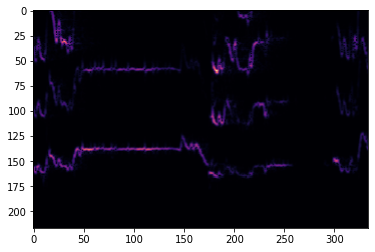

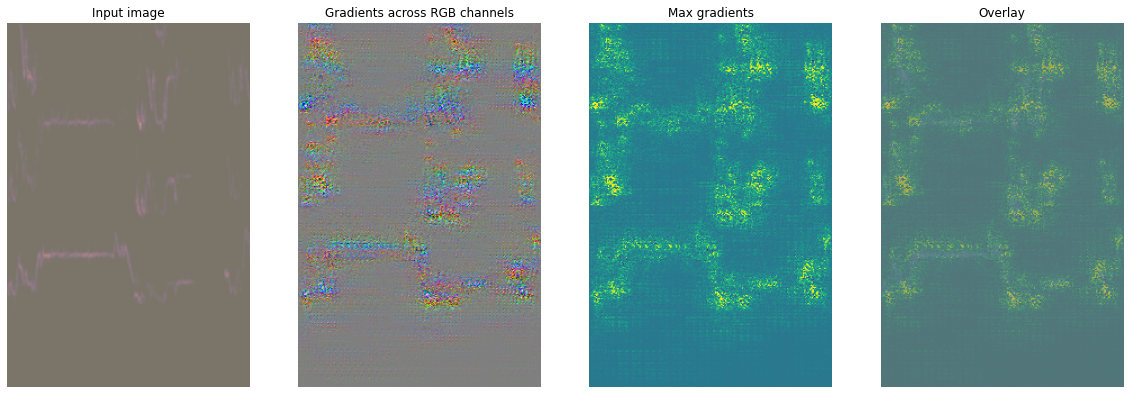

In [ ]:
image = load_image("/gdrive/My Drive/Major Project/Images/Experiment 2/Data/test/Abhogi/9_49.png")

plt.imshow(image)
inp = data_transforms["test"](image)
inp = inp.unsqueeze(dim=0)
inp.requires_grad = True

backprop.visualize(inp , 0 , guided=False , figsize=(20,10))
